# E-tivity 3: Clustering and Manifold Learning

## Student Name: Garret Molloy
## Student ID: 9021906

# Task 1 & 2 (CS5062)



- 1.1. Cluster loans_dataset_et3.csv with the k-Means clustering algorithm
- 1.2. Visualise the clustering


- 1.3. Use an appropriate feature-scaling technique 
- 1.4. Pick a value of k suggested by MDS and t-SNE visualisations of the dataset


- 1.5. Experiment with various values of the parameters of k-Means


- 1.6. Aim at producing a meaningful clustering that allows you to describe the clusters with words. 
- 1.7. Write a short conclusion about the characteristics of the clusters 


- 2.1 Plot the sum of squared distances from the data points (in loans_dataset_et3.csv) to the centers of the k-Means clusters for various values of k
- 2.2 Use the Elbow method to pick the best value of k


- 2.3 Attempt also another method for determining the best value of k. 
- 2.4 If these methods suggest a different value of k (from the one you used in Task 1), then compute a new k-Means clustering.


- 2.5 Use another clustering algorithm (from the ones available in scikit-learn) for the same dataset and an appropriate manifold-learning technique to visualise it.
 
- 2.6 Discuss the differences between the k-Means clustering and the clustering found by the second algorithm you have tried in words (max 250 words) and by visualising the clusterings with an appropriate manifold-learning technique.


### Import Python Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold
from sklearn import cluster
from sklearn import preprocessing

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

In [2]:
df = pd.read_csv("loans_dataset_et3.csv")

datax = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', datax.shape)

(number of examples, number of attributes):  (332, 5)


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,332.000000,332.000000,332.000000,332.000000,332.000000
mean,5201.093373,1495.508795,140.882530,341.710843,0.978916
std,4584.815491,1982.742932,75.544237,61.651497,0.143882
min,645.000000,0.000000,17.000000,60.000000,0.000000
25%,2912.750000,0.000000,100.000000,360.000000,1.000000
50%,3858.500000,1211.500000,128.000000,360.000000,1.000000
75%,5818.250000,2250.000000,162.000000,360.000000,1.000000
max,39999.000000,20000.000000,600.000000,480.000000,1.000000


All numerical fields, no missing data

In [4]:
df.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,2483,2466.0,90,180,0
1,4917,0.0,130,360,0
2,4106,0.0,40,180,1
3,3859,3300.0,142,180,1
4,6417,0.0,157,180,1


### B. Scale the Data

## <font color='red'><u>3 Different Scalers</u></font>

####  1. MinMaxScaler
####  2. RobustScaler
####  3. QuantleTransformer

(Task 1.3)

In [5]:
# Min Max Scaler
min_max_scaler = preprocessing.MinMaxScaler()
data_min = min_max_scaler.fit_transform(datax)

# With the MoinMax Scaler - the clustering did not match the visual representation
# So I am going to try a different scaler
data_robust = RobustScaler(quantile_range=(25, 75)).fit_transform(datax)

# This was mich worse so I am moving to a different scaler
data_quantile = QuantileTransformer(output_distribution='uniform').fit_transform(datax)

In [6]:
datax[0]

array([2483., 2466.,   90.,  180.,    0.])

In [7]:
data_min[0]

array([0.04670427, 0.1233    , 0.12521441, 0.28571429, 0.        ])

In [8]:
data_robust[0]

array([  -0.47341249,    0.55755556,   -0.61290323, -180.        ,
         -1.        ])

In [9]:
data_quantile[0]

array([1.42100469e-01, 8.00290839e-01, 1.72172172e-01, 5.60560561e-02,
       9.99999998e-08])

### C. Scatterplot Function (to be used below for visualising a clustering)


In [10]:
colors = np.array(['orange', 'blue', 'lime', 'purple', 'khaki', 'pink', 'green', 'red'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title):
    # plot the examples, i.e. the data points
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [11]:
def twin_plots_MDS_TSNE(k, data_and_centers, plot_rows, plot_start, title=""):
    #print("Plotting Graph", title,plot_start,"&",plot_start+1,"for k =",k)
    XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
    plt.subplot(plot_rows, 2, plot_start)
    clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS k=' + str(k)+ title)
    XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
    plt.subplot(plot_rows, 2, plot_start + 1)
    clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE k=' + str(k) + title)

## Task 1.1. Cluster loans_dataset_et3.csv with the k-Means clustering algorithm

#### K-Means Clustering
Number of clusters =3

# MDS & TSNE Plots with Data <font color='red'>Scaled 3 different ways</font>
Graphing for k = 3 for data that was scaled using 3 different scalers:
- MinMaxScaler
- RobustScaler
- QuantleTransformer

(Task 1.2)


 Cluster Plots with the Data Scaled 3 different ways


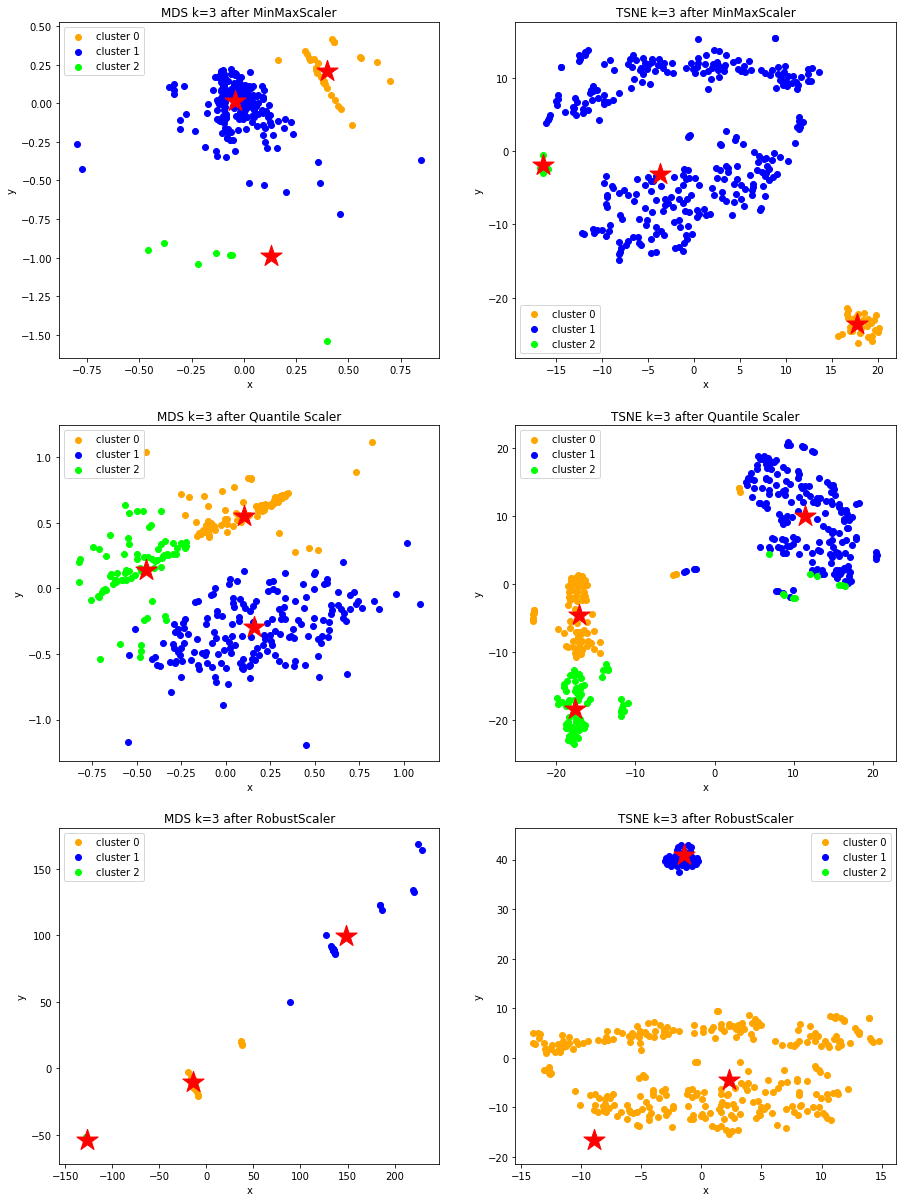

In [12]:
# Plots for k = 3 for different scalers
number_of_scalers = 3
k = 3

print("\n Cluster Plots with the Data Scaled 3 different ways")
fig, ax = plt.subplots(number_of_scalers, 2, figsize=(15,7*number_of_scalers))

clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data_min)
data_and_centers = np.r_[data_min,clustered_data_sklearn.cluster_centers_]
twin_plots_MDS_TSNE(k, data_and_centers, 3, 1, " after MinMaxScaler")

clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data_quantile)
data_and_centers = np.r_[data_quantile,clustered_data_sklearn.cluster_centers_]
twin_plots_MDS_TSNE(k, data_and_centers, 3, 3, " after Quantile Scaler")

clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data_robust)
data_and_centers = np.r_[data_robust,clustered_data_sklearn.cluster_centers_]
twin_plots_MDS_TSNE(k, data_and_centers, 3, 5, " after RobustScaler")

plt.show()

## 1.3 Pick Scaler
I liked the perfomance of the Quantile Scaler. The vizualization for MDS and k=3 matched the clustering to the visual groupings.

(Task 1.4)


## 1.4 Select Number of Scalers
### Cluster Analysis
Now that I have seleced the Scaler I will test a few different k values.

(Task 1.5)

# MDS & TSNE Plots for different number of Clusters

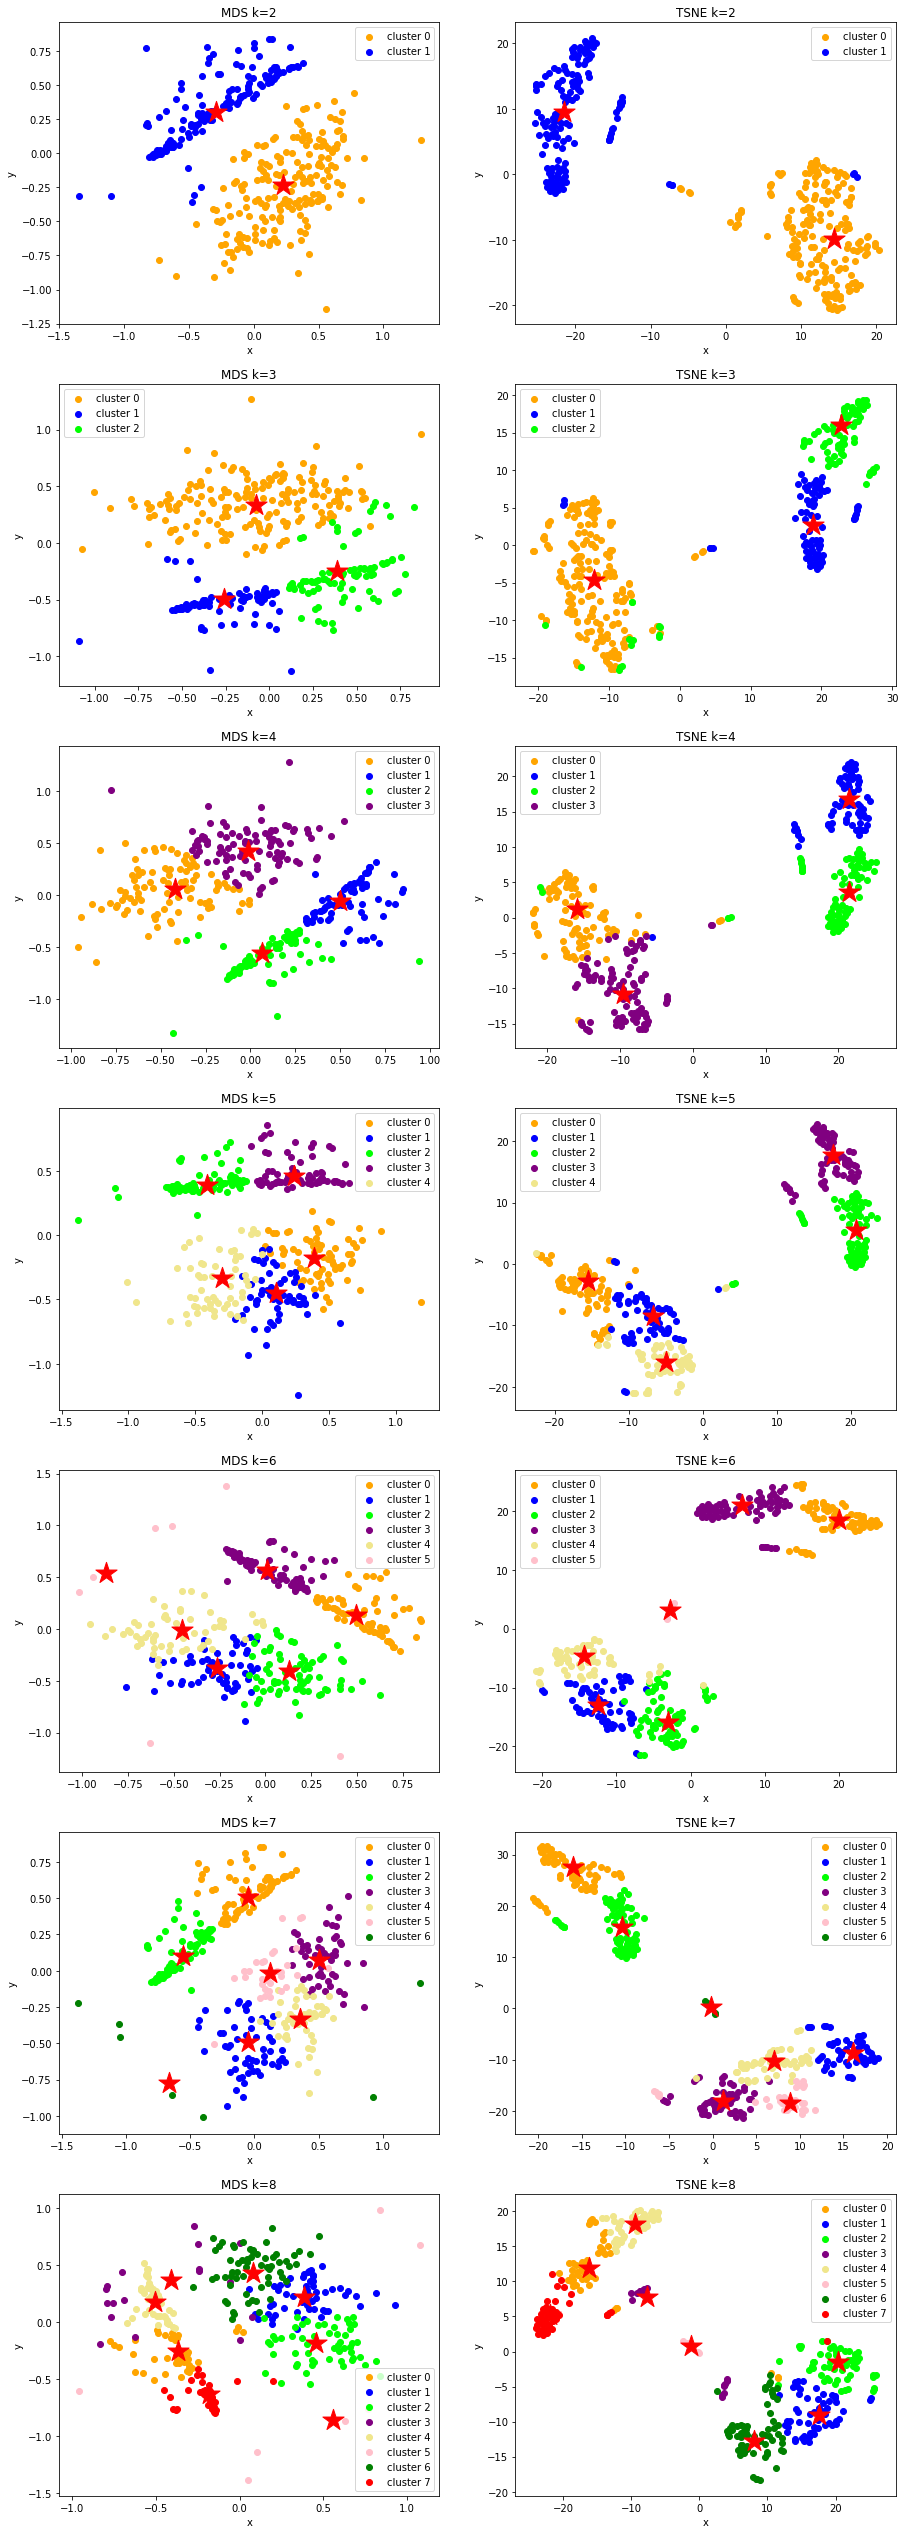

In [13]:
k_max = 8
fig, ax = plt.subplots(k_max-1, 2, figsize=(15, (6.5*(k_max-1))))

for k in range(2, k_max+1):
    clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=500, init='k-means++').fit(data_quantile)
    data_and_centers = np.r_[data_quantile,clustered_data_sklearn.cluster_centers_]
    twin_plots_MDS_TSNE(k, data_and_centers, k_max-1, (2*k)-3)
plt.show()

# MDS & TSNE Plots for different number of Clusters (Different Params)

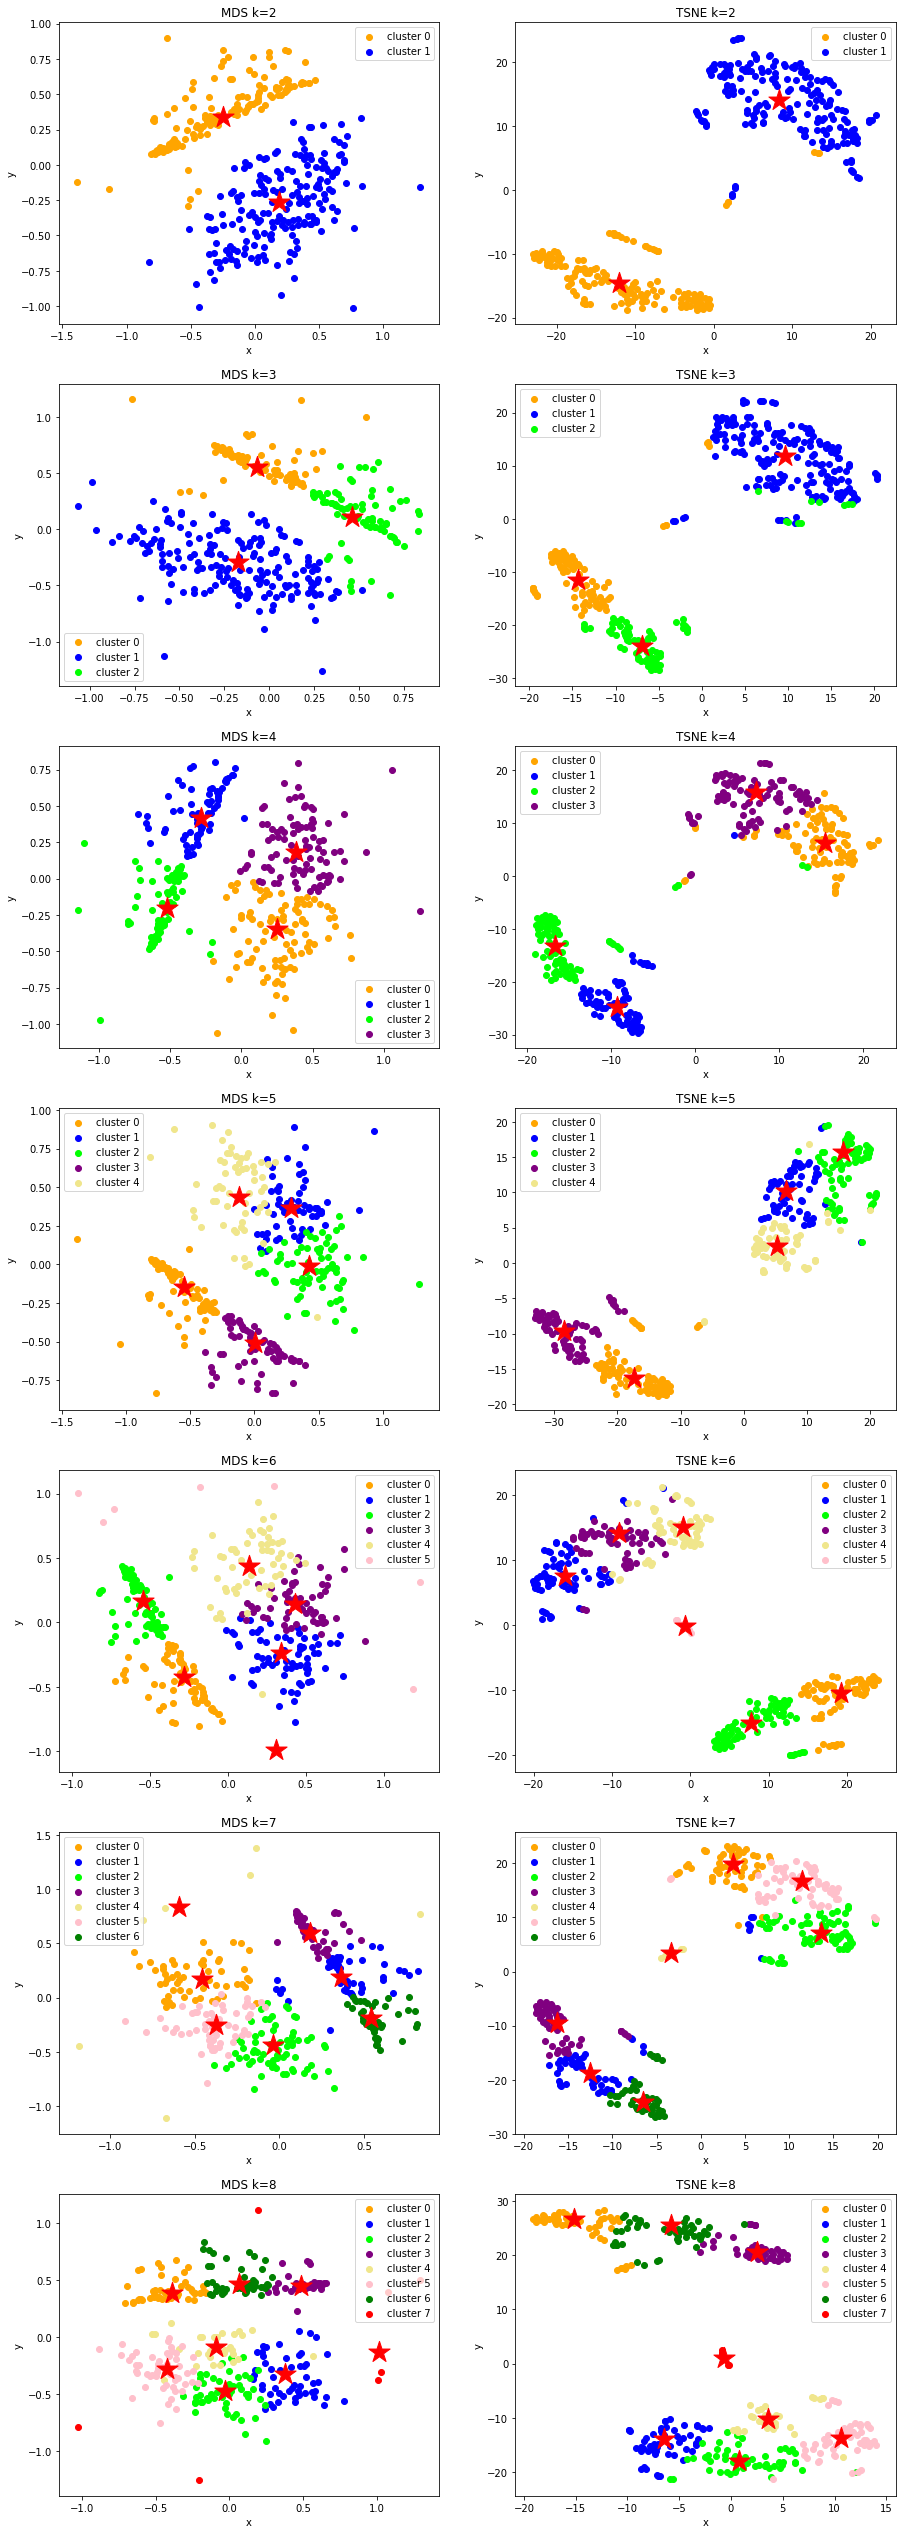

In [14]:
k_max = 8
fig, ax = plt.subplots(k_max-1, 2, figsize=(15, (6.5*(k_max-1))))

for k in range(2, k_max+1):
    clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=500).fit(data_quantile)
    data_and_centers = np.r_[data_quantile,clustered_data_sklearn.cluster_centers_]
    twin_plots_MDS_TSNE(k, data_and_centers, k_max-1, (2*k)-3)
plt.show()

k = 4 seems to be the best 

## Alternate Clustering Agoritm   - Affinity Propogation

(Task 2.5)

In [15]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
import matplotlib.pyplot as plt
from itertools import cycle

# Plot result
def plot_affinity_propogation_clusters(X, af):
    cluster_centers_indices = af.cluster_centers_indices_
    labels = af.labels_
    n_clusters_ = len(cluster_centers_indices)
    
    plt.close('all')
    plt.figure(1)
    plt.clf()

    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        cluster_center = X[cluster_centers_indices[k]]
        plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
        plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=14)
        for x in X[class_members]:
            plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

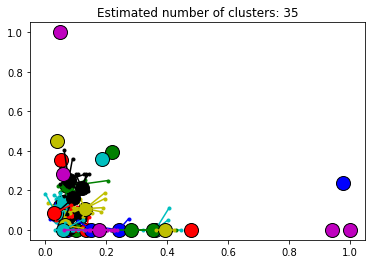

In [16]:
# Compute Affinity Propagation - Min Max Scaling of Data
X = data_min
af = AffinityPropagation().fit(X)
plot_affinity_propogation_clusters(X, af)

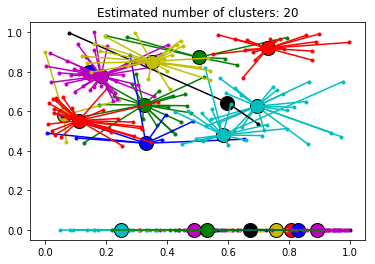

In [17]:
# Compute Affinity Propagation - Quantile Scaling of Data
X = data_quantile
af = AffinityPropagation().fit(X)
plot_affinity_propogation_clusters(X, af)

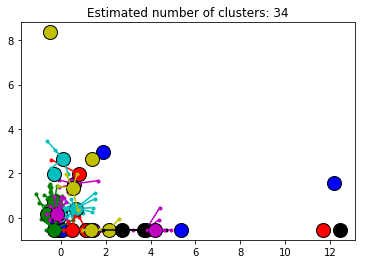

In [18]:
# Compute Affinity Propagation - Robust Scaling of Data
X = data_robust
af = AffinityPropagation().fit(X)
plot_affinity_propogation_clusters(X, af)

### Affinity Propagation found too many clusters, I will change the parameters

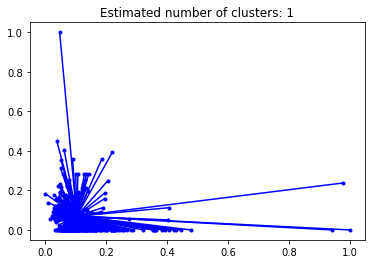

In [19]:
# Compute Affinity Propagation - Min Max Scaling of Data
X = data_min
af = AffinityPropagation(preference=-50, convergence_iter=50,
          damping=0.9, max_iter=400).fit(X)
plot_affinity_propogation_clusters(X, af)

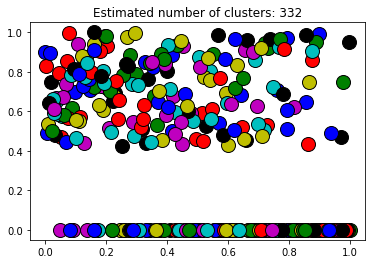

In [20]:
# Compute Affinity Propagation - Quantile Scaling of Data
X = data_quantile
af = AffinityPropagation(preference=0, convergence_iter=50,
          damping=.5, max_iter=400).fit(X)
plot_affinity_propogation_clusters(X, af)

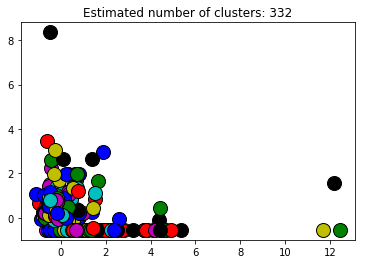

In [21]:
# Compute Affinity Propagation - Robust Scaling of Data
X = data_robust
af = AffinityPropagation(preference=0, convergence_iter=50,
          damping=0.9, max_iter=400).fit(X)
plot_affinity_propogation_clusters(X, af)

Affinity Prpoogation Clustering did not yield good results, I since read that this is better for more complex data with more clusters, so perhaps not a good fit.

## Another Clustering Algorithm DBSCAN

(Task 2.5)

Silhouette Coefficient: 0.104


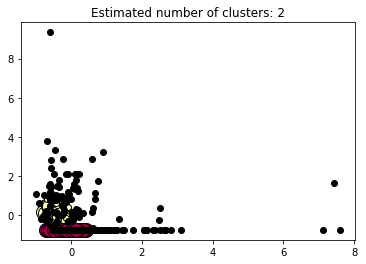

In [35]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(datax)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)


plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## Another Evalutation of Clusters - The silhouette coefficient
The silhouette coefficient can range from -1, 1

(Task 2.3, Task 2.5)

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.3958331519475405
For n_clusters = 3 The average silhouette_score is : 0.36771328092326816
For n_clusters = 4 The average silhouette_score is : 0.3685989117677958
For n_clusters = 5 The average silhouette_score is : 0.38449552291851663
For n_clusters = 6 The average silhouette_score is : 0.3521913121139126
For n_clusters = 7 The average silhouette_score is : 0.3638195336745849


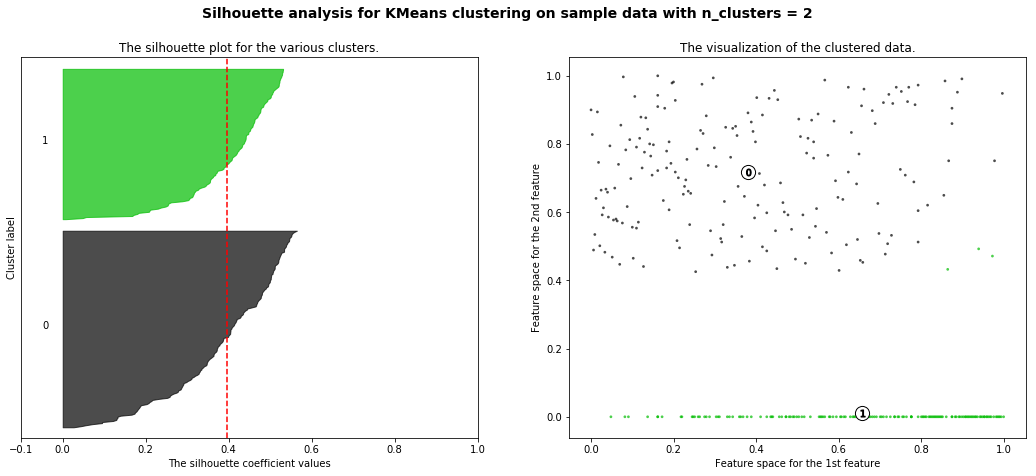

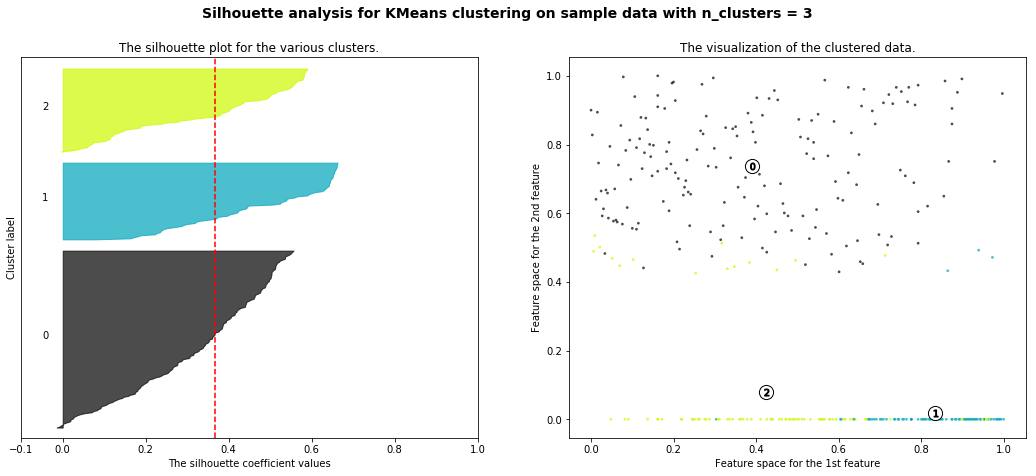

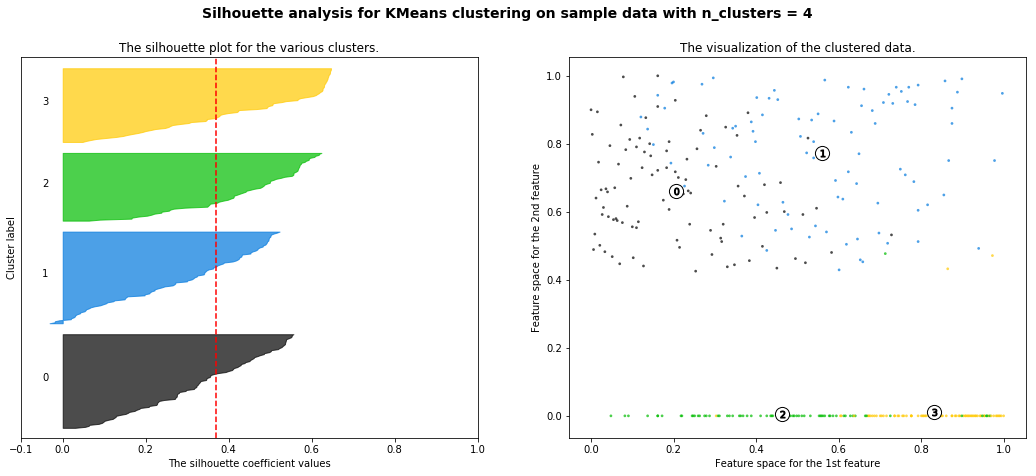

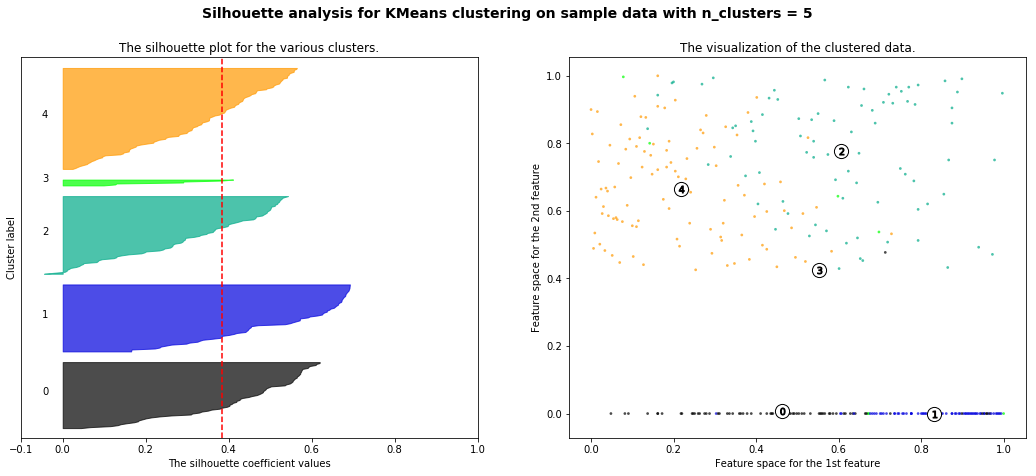

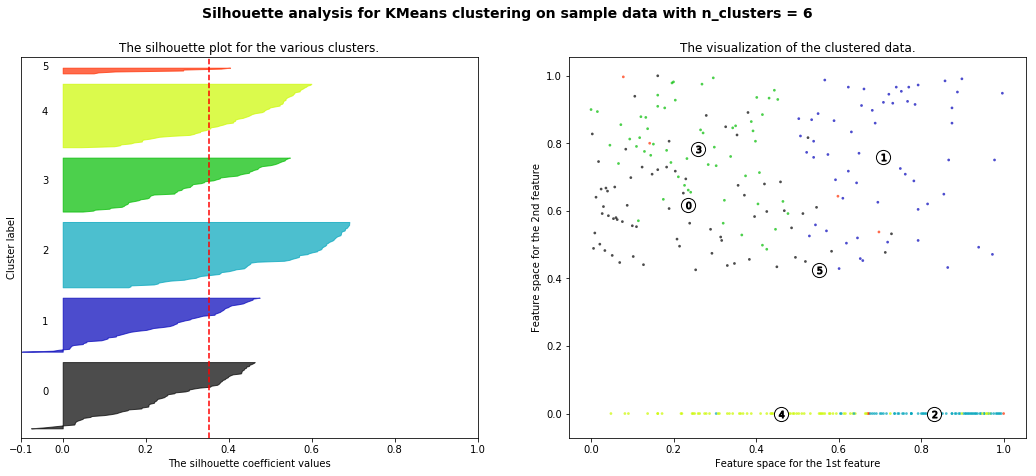

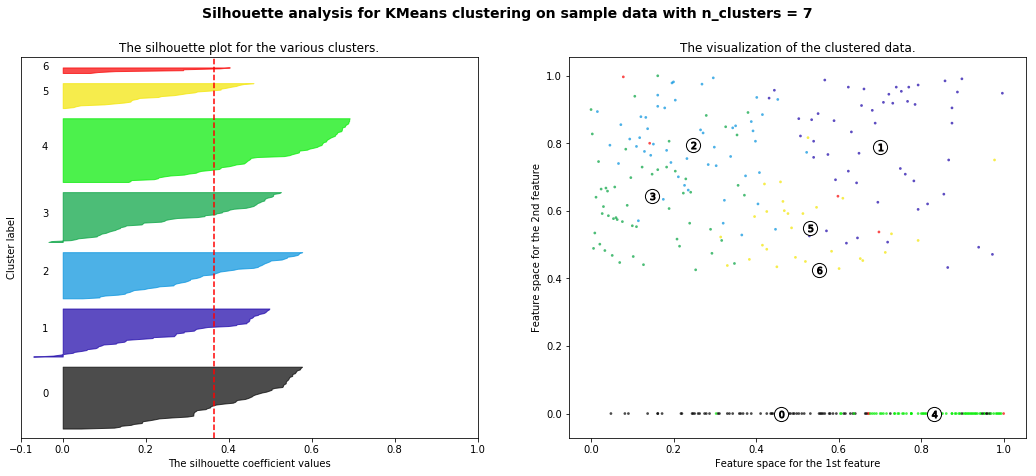

In [23]:
from __future__ import print_function

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = data_quantile

range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


The K Means was a distance model, compting the center of a cluster, assiging it data samples that are closet to it, recentering and reassigning until convergence.
This is why chosing the inital centers is importan.
Indeed this explains wjhy some of the clusters did not match the visual representation, as the originally slected centers did not help accurate convergence as expected visually.
The method is meant to overcome this with multiple initial center selections and chossing the best after scoring.

The Shilouette scoer is how far a sample is frmo it's cluster mates (should be very close) as opposed to other cluser samples (should be far away).
Different elements in a cluster will have different scores, which we can see inthe Sillhoutte plot.

(Task 2.6)

## 1.5 Elbow Graph to Validate seletion for k

(Task 2.1, Task 2.2)

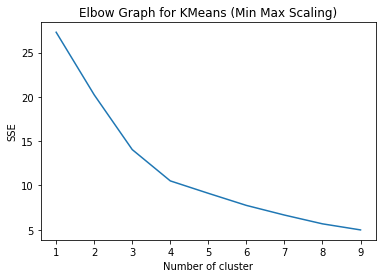

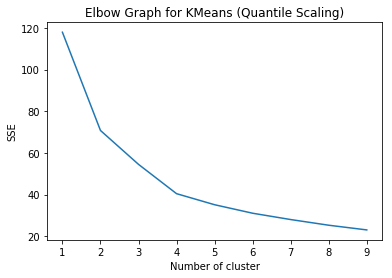

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_min)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.title("Elbow Graph for KMeans (Min Max Scaling)")
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_quantile)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.title("Elbow Graph for KMeans (Quantile Scaling)")
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

As we are using Quantile Scaled data. k = 5 tallies with the vizualizations above.


In [25]:
# I have decided on k=5 using Quantile Scaling and will now ee what these clusters might represent using the data 
# Inspiration from Michel Danjou for the mean method for the data

clustered_data_sklearn = cluster.KMeans(n_clusters=5, n_init=10, max_iter=500, init='k-means++').fit(data_quantile)

df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)
df['total_income'] = df['ApplicantIncome']+df['CoapplicantIncome']

df.groupby('cluster').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,total_income
cluster,,,,,,
0,2647.301075,2105.816344,103.483871,348.903226,1.0,4753.117419
1,9068.027397,32.602740,194.739726,338.630137,1.0,9100.630137
2,9153.857143,2098.142857,206.285714,308.571429,0.0,11252.000000
3,5032.577778,3139.655556,175.955556,342.666667,1.0,8172.233333
4,4370.855072,14.956522,81.927536,337.391304,1.0,4385.811594


## Review of Clusters:

#### All Data:
- Cluster Type A=0: Double Income, Low Income,    Low Loan   1, 0, 0
- Cluster Type B=1: Single Income, Medium Income, High Loan  0, 1, 1
- Cluster Type C=3: Double Income, Medium Income, High Loan  1, 1, 1
- Cluster Type D=4: Single Income, Low Income,    Low Loan   0, 0, 0
- Cluster Type E=2: Double Income, High Income,   High Loan  1, 2, 1

If I look at the clusters for all the data samples, I see the asverages indicate slightly different groupings, as suggested by the above naming.

To validate this approach I wanted to split my original data into train and test. Perform this clustering assessment pon the training data and validate this clustering assumption with the test data

**Note: With different runs of the notebook, the cluster numbers are different**

(Task 1.6, 1.7)

## Splt Data in to Train and Test

In [26]:
# Split the data in to train and test (80/20 split) and ensure the data is shuffled.
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(datax, test_size = 0.3, shuffle=True)

In [27]:
# Both the training and the test data scaled the same way
train_data_quantile = QuantileTransformer(output_distribution='uniform').fit_transform(X_train)
test_data_quantile = QuantileTransformer(output_distribution='uniform').fit_transform(X_test)

In [28]:
train_clustered_data = cluster.KMeans(n_clusters=5, n_init=10, max_iter=500, init='k-means++').fit(train_data_quantile)
test_clustered_data = cluster.KMeans(n_clusters=5, n_init=10, max_iter=500, init='k-means++').fit(test_data_quantile)

In [29]:
train_data_quantile.shape

(232, 5)

In [30]:
test_data_quantile.shape

(100, 5)

In [31]:
train_df = pd.DataFrame(data=X_train,
          index=np.array(range(1, X_train.shape[0]+1)),
          columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'])
test_df = pd.DataFrame(data=X_test,
          index=np.array(range(1, X_test.shape[0]+1)),
          columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'])

In [32]:
clustered_data_train = cluster.KMeans(n_clusters=5, n_init=10, max_iter=500, init='k-means++').fit(train_data_quantile)

train_df['cluster'] = pd.Series(clustered_data_train.labels_, index=train_df.index)
train_df['total_income'] = train_df['ApplicantIncome']+train_df['CoapplicantIncome']

train_df.groupby('cluster').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,total_income
cluster,,,,,,
0,5157.833333,3095.400000,171.616667,347.000000,1.0,8253.233333
1,9054.540000,0.000000,186.680000,332.400000,1.0,9054.540000
2,4414.250000,19.846154,83.576923,346.153846,1.0,4434.096154
3,2587.593750,1809.342500,100.734375,343.875000,1.0,4396.936250
4,10265.666667,2036.833333,225.666667,330.000000,0.0,12302.500000


## Training Data Clusters: 
- Cluster Type A=3: Double Income, Low Income,    Low Loan   1, 0, 0
- Cluster Type B=1: Single Income, Medium Income, High Loan  0, 1, 1
- Cluster Type C=0: Double Income, Medium Income, High Loan  1, 1, 1
- Cluster Type D=2: Single Income, Low Income,    Low Loan   0, 0, 0
- Cluster Type E=4: Double Income, High Income,   High Loan  1, 2, 1


Perfect match to my whole data cluster Type categorizations [A-E], the cluster numbers are different, but the defined types match.

Now I want to confirm the test data matches this clustering.

In [33]:
clustered_data_test = cluster.KMeans(n_clusters=5, n_init=10, max_iter=500, init='k-means++').fit(test_data_quantile)

test_df['cluster'] = pd.Series(clustered_data_test.labels_, index=test_df.index)
test_df['total_income'] = test_df['ApplicantIncome']+test_df['CoapplicantIncome']

test_df.groupby('cluster').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,total_income
cluster,,,,,,
0,2633.250000,2807.468750,117.281250,360.0,1.000000,5440.718750
1,4573.842105,42.105263,95.842105,360.0,1.000000,4615.947368
2,5206.909091,2190.909091,134.727273,180.0,0.909091,7397.818182
3,9954.375000,78.375000,239.375000,360.0,1.000000,10032.750000
4,5459.636364,2988.227273,186.772727,360.0,1.000000,8447.863636


## Test Data Clusters: 

- Cluster Type A=0: Double Income, Low Income,    Low Loan   1, 0, 0
- Cluster Type B=3: Single Income, Medium Income, High Loan  0, 1, 1
- Cluster Type C=4: Double Income, Medium Income, High Loan  1, 1, 1
- Cluster Type D=1: Single Income, Low Income,    Low Loan   0, 0, 0
- Cluster Type E=<font color='red'>**No Match**</font>: Double Income, High Income,   High Loan  1, 2, 1

- <font color='red'>No Cluster Type for Cluster 2</font>: Double Income, Medium Income, Low Loan

I cannot see direct matches for all clusters, they are a bit off, I can assume the amount of test data is too small to get an accurate representation.

I did this first for a split of 80/20 and could not match 3 clusters (67 samples). 

I ran the test again with a larger split for test 70/30 and have now only 1 unmatched cluster, which is only slightly off.

So I can have some confidence in the cluster idea.